<H3>    First Name: Balkattu Shreekantha Uttam
<H3>    Last Name: Kannantha
<H3>    USC ID: 9202391620
<H3>    Github UserName: Uttamkannantha

<h4> Importing all the headers

In [102]:
import glob
import pandas as pd
from scipy.stats import bootstrap
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h4>1.(a) Reading all the files

In [103]:
files_names=glob.glob("../data/AReM/*/*.csv")
print("Number of files",len(files_names))

Number of files 88


<h4>1.(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [104]:

fileNeeded=['dataset1.csv','dataset2.csv','dataset3.csv']
testData=[]
trainData=[]

#extract dataset 1, 2 ,3 and add it to test_files, remaining in train_files
for file in files_names:
    if file.split('/')[-1] in fileNeeded:
        testData.append(file)
    else:
        trainData.append(file)


# remove dataset 3 from bending1 and bending2 from test_files and add it to train_files
for file in testData:
    if file.split('/')[-2]=='bending1' or file.split('/')[-2]=='bending2':
        if file.split('/')[-1]=='dataset3.csv':
            testData.remove(file)
            trainData.append(file)
        

print("Test",len(testData))     
print("Train",len(trainData))     

dfTest = pd.DataFrame(columns=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])

#Creating the test dataframe
for file in testData:
        df=pd.read_csv(file,skiprows=4)
        df.columns =['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']       
        dfTest=pd.concat([dfTest, df], ignore_index=True)
        
#Creating the train data frame 

dfTrain = pd.DataFrame(columns=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])        
        
for file in trainData:
        if(file == '../data/AReM/bending2/dataset4.csv'):
            df =pd.read_csv(file,skiprows=5,delimiter=' ')
            df =df.T.reset_index().T.reset_index(drop=True)
            df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
            df.columns =['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        else:
            df=pd.read_csv(file,skiprows=4)
            df.columns =['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
        dfTrain=pd.concat([dfTrain, df], ignore_index=True)



Test 19
Train 69


<h4>(c) Feature Extraction

<h4> i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

<h4>Simple statistical features</h4>
Means in each of the 𝑑 dimensions
<br>Standard deviations of the 𝑑 dimensions
<br>Skewness, Kurtosis and Higher order moments of the 𝑑 dimensions
<br>Maximum and Minimum values

<h4>ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [105]:
features=['min','max','mean','median','standard_devation','first_quartile','third_quartile']
# column_names=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
column_names=['1','2','3','4','5','6']
column_list=[]

for column in column_names:
    for feature in features:
        
        column_list.append(feature+'_'+column)


In [106]:
featureDataFrame = pd.DataFrame(columns = column_list)

print(len(featureDataFrame.columns))

columnNamesWithTime = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
i =0
for file in files_names:

    df = pd.DataFrame()
    
    if(file == '../data/AReM/bending2/dataset4.csv'):
        df =pd.read_csv(file,skiprows=5,delimiter=' ',names = columnNamesWithTime,index_col = False)
#         df =df.T.reset_index().T.reset_index(drop=True)
#         df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
#         df.columns =['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
#         print(df)
        
    else:
        df = pd.read_csv(file, skiprows = 5, names = columnNamesWithTime)
        
    df = df.drop(['time'], axis=1)
#     print(df.head)
    colFeature = []
        
    for column in df.columns: 
        colFeature.append(df[column].min())
        colFeature.append(df[column].max())          
        colFeature.append(df[column].mean())
        colFeature.append(df[column].median())
        colFeature.append(df[column].std())
        colFeature.append(df[column].quantile(0.25))
        colFeature.append(df[column].quantile(0.75))       
    featureDataFrame = featureDataFrame.append(pd.Series(colFeature, index = featureDataFrame.columns), ignore_index = True)
featureDataFrame



42


,min_1,max_1,mean_1,median_1,standard_devation_1,first_quartile_1,third_quartile_1,min_2,max_2,mean_2,...,standard_devation_5,first_quartile_5,third_quartile_5,min_6,max_6,mean_6,median_6,standard_devation_6,first_quartile_6,third_quartile_6
0,36.25,48.0,43.969125,44.5,1.618364,43.31,44.67,0.0,1.5,0.413125,...,3.318301,20.5,23.75,0.0,2.96,0.555313,0.49,0.487826,0.0,0.83
1,37.0,48.0,43.454958,43.25,1.386098,42.5,45.0,0.0,1.58,0.378083,...,2.488862,22.25,24.0,0.0,5.26,0.679646,0.5,0.622534,0.43,0.87
2,33.0,47.75,42.179813,43.5,3.670666,39.15,45.0,0.0,3.0,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.5,0.524317,0.0,1.0
3,33.0,45.75,41.678063,41.75,2.24349,41.33,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.43,0.389164,0.0,0.5
4,37.25,45.0,40.624792,40.5,1.476967,39.25,42.0,0.0,1.3,0.358604,...,2.188449,33.0,36.0,0.0,1.92,0.570583,0.43,0.582915,0.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.5,44.25,35.752354,36.0,4.614802,33.0,39.33,0.0,12.6,3.328104,...,3.120057,14.0,18.0625,0.0,9.39,3.069667,2.77,1.748326,1.7975,4.06
84,24.25,45.0,37.177042,36.25,3.581301,34.5,40.25,0.0,8.58,2.374208,...,2.890347,17.95,21.75,0.0,9.34,2.921729,2.5,1.8526,1.5,3.9
85,23.33,43.5,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.75,21.0,0.0,11.15,3.5305,3.11,1.963685,2.17,4.6175
86,26.25,44.25,36.957458,36.29,3.434863,34.5,40.25,0.0,8.64,2.420083,...,2.851673,14.0,18.25,0.0,8.34,2.934625,2.525,1.63138,1.66,4.03


<h4>iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [107]:
#for every column in featureDataFrame, calculate the mean and standard deviation and store it in df with first columns as heading of the column and second column as mean and third column as standard deviation
stdMeanDf = pd.DataFrame(columns = ['feature', 'standard_deviation'])
for column in featureDataFrame.columns:
    stdMeanDf = stdMeanDf.append({'feature': column,  'standard_deviation': featureDataFrame[column].std()}, ignore_index = True)

stdMeanDf    


,feature,standard_deviation
0,min_1,9.569975
1,max_1,4.394362
2,mean_1,5.335718
3,median_1,5.440054
4,standard_devation_1,1.772153
5,first_quartile_1,6.15359
6,third_quartile_1,5.138925
7,min_2,0.0
8,max_2,5.062729
9,mean_2,1.574164


In [108]:
stdMeanDf = pd.DataFrame(columns = ['feature', 'standard_deviation','90% Interval'])
for col in column_list:
    data=featureDataFrame[col].tolist()

    data = (data,)

    bootstrap_ci = bootstrap(data, np.std, confidence_level=0.90, random_state=1, method='percentile')
    
    #view 90% boostrapped confidence interval
    interval = [bootstrap_ci.confidence_interval[0],bootstrap_ci.confidence_interval[1]]
    
    stdMeanDf = stdMeanDf.append({'feature': col,  'standard_deviation': featureDataFrame[col].std() , '90% Interval':interval}, ignore_index = True)
    
stdMeanDf

,feature,standard_deviation,90% Interval
0,min_1,9.569975,"[8.21734809687677, 10.704231108027612]"
1,max_1,4.394362,"[3.306005074433925, 5.269063422099606]"
2,mean_1,5.335718,"[4.675214277705429, 5.837115077961118]"
3,median_1,5.440054,"[4.760293781687243, 5.964648674780459]"
4,standard_devation_1,1.772153,"[1.562763357753544, 1.9355695999646685]"
5,first_quartile_1,6.15359,"[5.5423116547107885, 6.603819063160113]"
6,third_quartile_1,5.138925,"[4.308947238191441, 5.806971606808484]"
7,min_2,0.0,"[0.0, 0.0]"
8,max_2,5.062729,"[4.595134343103269, 5.377385271413594]"
9,mean_2,1.574164,"[1.3930997015043582, 1.698067629533194]"


<h4>iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

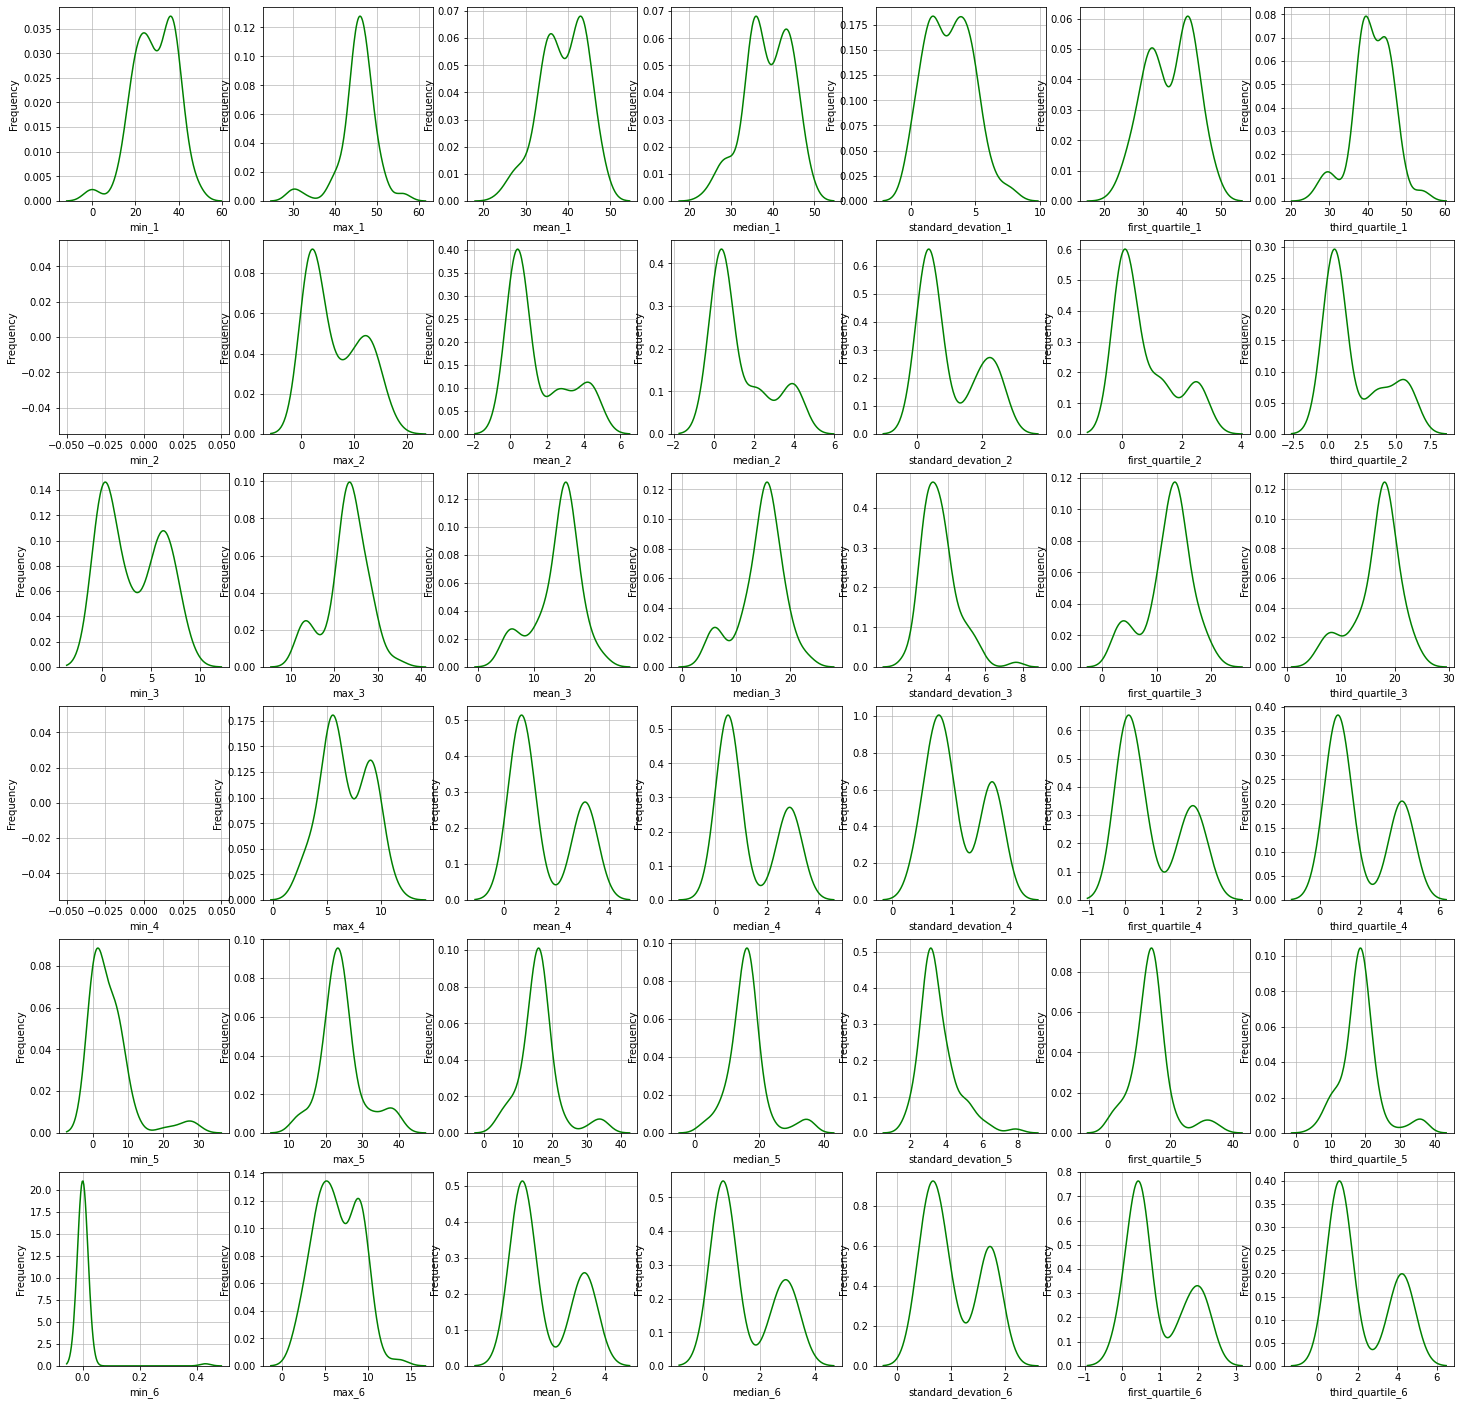

In [109]:
i=1
plt.figure(figsize=(25,25))

for col in featureDataFrame.columns:
    plt.subplot(6, 7,i)
    sns.kdeplot(featureDataFrame[col], color = 'green')    
    plt.ylabel("Frequency") 
    plt.xlabel(str(col)) 
    plt.grid(True, alpha=.8, linestyle="-") 
    i= i+1
plt.show()

Time series data gives better results when the data spreads over a large range. From the above curve we can say that mean, max, third quartile or std has better chances to give better results. 

<h4>
2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

<h4>(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Ans: Cubic regression will have low RSS as we are increasing the flexibility in cubic regressionn when compared to linerar. Cubic regression might overfit as the data is small and hence in return low RSS

<h4>(b) Answer (a) using test rather than training RSS.

Ans: Here we can expect liner to have low RSS as the model is linear and cubic regression might have overfit the data

<h4>(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Ans: Cubic model will perform better than linear. If the data is far from liner then the RSS of cubic will be very low when compared to linear but if the data is close to linear then both the model will have very similar or close results. However in general we expect cubic to perform better on training data

<h4>(d) Answer (c) using test rather than training RSS.

Ans: It is difficult to predict the answer as we dont know how far off the data is from being linear. If the data is colse to linear we expect linerar regression to have low RSS on test data but if the data is far off from being linear then we expect cubic to perform better.

<H4>References
    

https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
https://stackoverflow.com/questions/72396854/how-do-i-add-a-header-into-a-dataframe-without-removing-the-first-row
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
https://www.statology.org/bootstrapping-in-python/#:~:text=The%20basic%20process%20for%20bootstrapping,confidence%20interval%20for%20the%20statistic.
https://www.codespeedy.com/how-to-change-line-color-in-matplotlib/
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html